This notebook focuses on developing two different machine learning models: logistic regression for a baseline probabilistic view and random forest for non-linear relationship between variables. 

In [112]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_unified = pd.read_csv('processed_data/unified_data_to_ML.csv').dropna()
df_unified = df_unified[df_unified['dti'].between(0, 100)]


X = df_unified[['loan_amnt', 'risk_score', 'dti', 'emp_length']]
y = df_unified['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

              precision    recall  f1-score   support

           0       0.77      0.77      0.77     92685
           1       0.78      0.79      0.78     99728

    accuracy                           0.78    192413
   macro avg       0.78      0.78      0.78    192413
weighted avg       0.78      0.78      0.78    192413



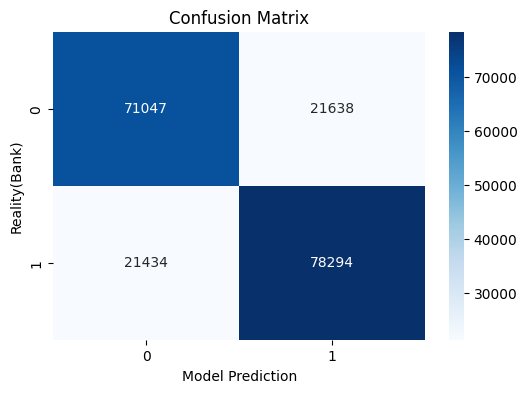

In [113]:
print(classification_report(y_test, y_pred))

plt.figure(figsize=(6,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Model Prediction')
plt.ylabel('Reality(Bank)')
plt.title('Confusion Matrix')
plt.show()

This block implements a Logistic Regression as a baseline model for predicting loan approvals, achieving an initial accuracy of 78%. After cleaning and scaling the unified data, the confusion matrix shows a balanced performance across both classes, confirming that the model successfully identifies general trends for both rejections and acceptances without significant bias.

In [119]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth = 10, class_weight='balanced')
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print(classification_report(y_test, y_pred_rf))

              precision    recall  f1-score   support

           0       0.93      0.85      0.89     92685
           1       0.87      0.94      0.90     99728

    accuracy                           0.90    192413
   macro avg       0.90      0.90      0.90    192413
weighted avg       0.90      0.90      0.90    192413



C:\Users\Israel\AppData\Local\Temp\ipykernel_42764\7408500.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Variable', data=importancies, palette='viridis')


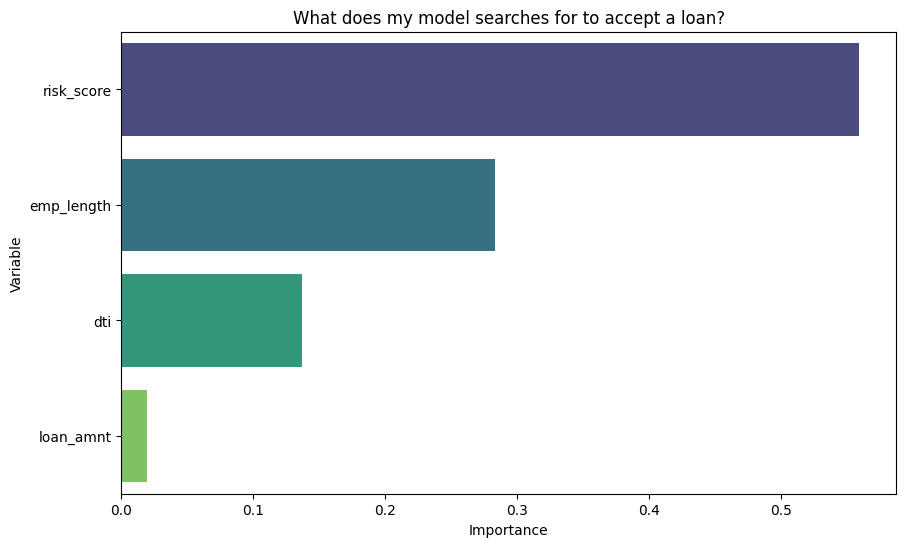

In [120]:
importancies = pd.DataFrame({
    'Variable': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Variable', data=importancies, palette='viridis')
plt.title('What does my model searches for to accept a loan?')
plt.show()

This block implements the Random Forest Classifier, which significantly outperforms the baseline with a 90% accuracy. By using max_depth=10 and class_weight='balanced', the model avoids overfitting to noise while ensuring both approved and rejected applications are treated with equal importance.

This confirms that the risk_score is the overwhelming deciding factor, followed by the employment length. 

In [137]:
def simulate_loan(amount, score, dti, emp_length):
    input_data = pd.DataFrame({
        'loan_amnt': [amount],
        'risk_score': [score],
        'dti': [dti],
        'emp_length': [emp_length]
    })
    prediction = rf_model.predict(input_data)
    probabilities = rf_model.predict_proba(input_data)[0] 
    
    print(f"--- Evaluation Results ---")
    print(f"State: {prediction[0]}")
    print(f"Acceptance Probability: {probabilities[1]*100:.2f}%")
    print(f"Rejection Probability: {probabilities[0]*100:.2f}%")

simulate_loan(amount = 1000, score = 700, dti = 10, emp_length = 10)

--- Evaluation Results ---
State: 1
Acceptance Probability: 79.22%
Rejection Probability: 20.78%


The final component of the project is a functional simulation engine that utilizes the trained Random Forest model to evaluate new loan applications instantly. By inputting specific variables such as loan amount, risk score, DTI, and employment length, the function generates a clear "Approved" or "Rejected" status along with the specific probability for each outcome. 